In [2]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pickle

In [87]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/Loan/Training Data.csv')

In [88]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [30]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0
251999,252000,9070230,70,17,single,rented,no,Statistician,Avadi,Tamil_Nadu,7,11,0


In [12]:
df.sample(5)

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
26329,26330,7217848,23,3,single,rented,no,Official,Jhansi,Uttar_Pradesh,3,13,0
197599,197600,7864739,61,10,single,rented,no,Physician,Phusro,Jharkhand,5,11,1
31342,31343,7153397,49,18,single,rented,no,Industrial_Engineer,Satara,Maharashtra,14,10,0
5977,5978,893955,28,8,married,rented,no,Geologist,Bally,West_Bengal,3,14,0
4119,4120,4786725,24,11,single,rented,no,Lawyer,Jaunpur,Uttar_Pradesh,7,11,0


# 1. Descriptive Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Berdasarkan tipe data, semua fitur memiliki tipe data yang sudah sesuai.

In [11]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

Berdasarkan data diatas, tidak ada nilai null

In [10]:
numericals = ['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
categoricals = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']

In [29]:
df.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [28]:
df[categoricals].describe()

,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE
count,252000,252000,252000,252000,252000,252000
unique,2,3,2,51,317,29
top,single,rented,no,Physician,Vijayanagaram,Uttar_Pradesh
freq,226272,231898,176000,5957,1259,28400


In [16]:
df.duplicated().sum()

0

In [17]:
for col in categoricals:
    print('value count kolom', {col})
    print(df[col].value_counts())
    print()

value count kolom {'Married/Single'}
Married/Single
single     226272
married     25728
Name: count, dtype: int64

value count kolom {'House_Ownership'}
House_Ownership
rented          231898
owned            12918
norent_noown      7184
Name: count, dtype: int64

value count kolom {'Profession'}
Profession
Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                 

# Univariate Analysis

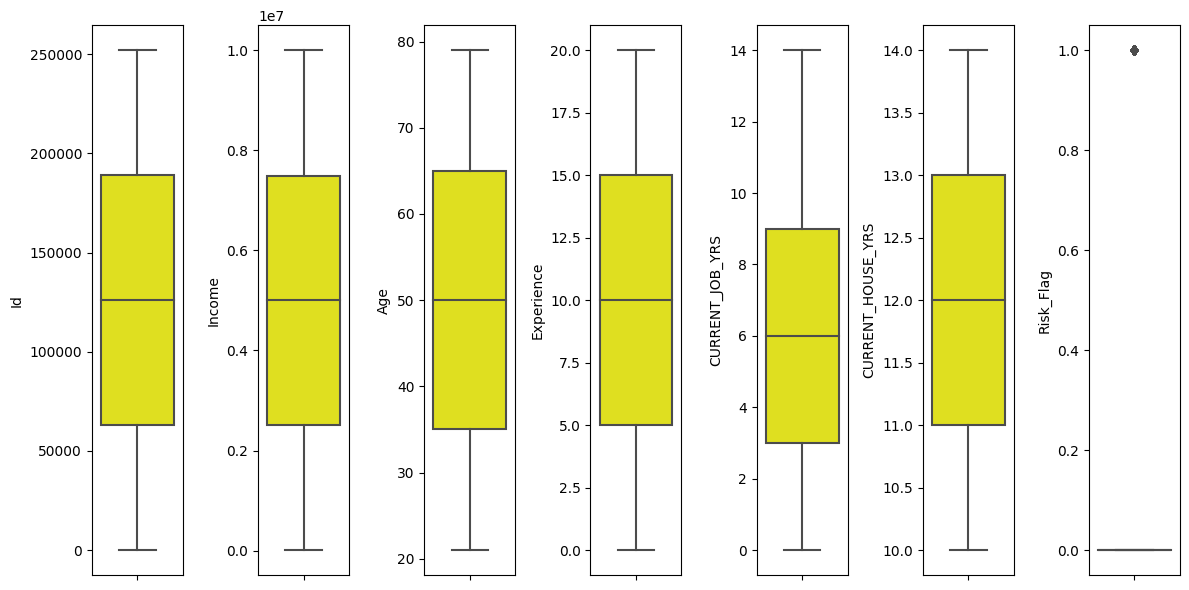

In [38]:
features = numericals
plt.figure(figsize=(12, 6))
for i in range (0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='yellow', orient='v')
    plt.tight_layout()

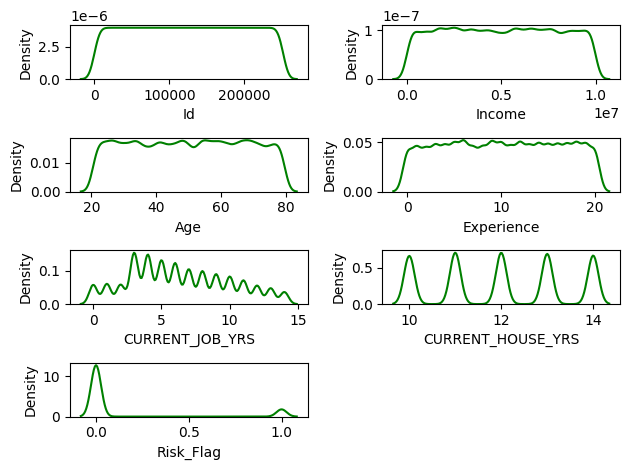

In [32]:
features = numericals
for i in range (0, len(features)):
    plt.subplot(4, 2, i+1)
    sns.kdeplot(x=df[features[i]], color='green')
    plt.xlabel(features[i])
    plt.tight_layout()

Berdasarkan hasil menunjukkan bahwa untuk variabel current house years terjadi bimodal yang menandakan bahwa lama tinggal pada rumah tersebut dan distribusi bagi variabel income dan age memiliki distribusi yang mendekati normal sedangkan untuk variabel current job years memiliki kecenderungan untuk positive skewed. Keempat variabel income, age, dan experience perlu di follow up karena memiliki bentuk distribusi yang unik. 

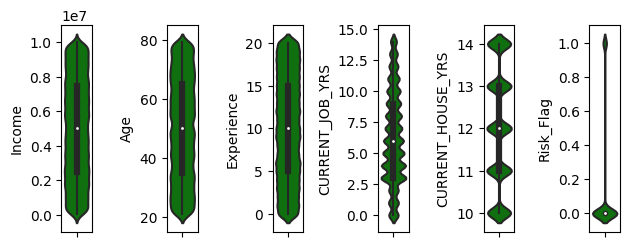

In [37]:
features = numericals
for i in range (0, len(features)):
    plt.subplot(4, len(features), i+1)
    sns.violinplot(y=df[features[i]], color='green')
    plt.tight_layout()

## Categoricals 

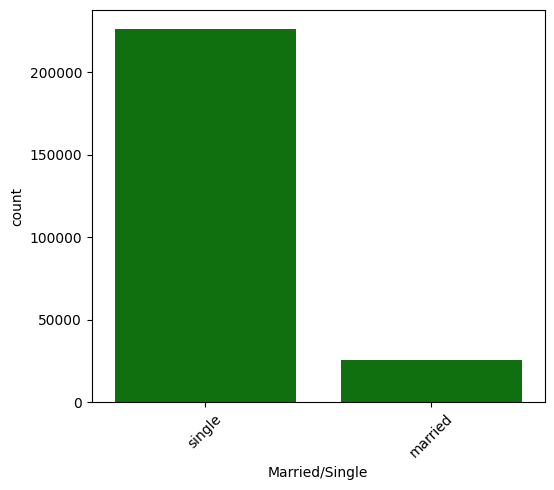

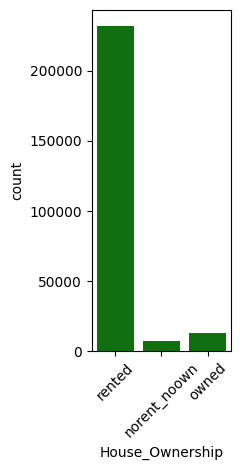

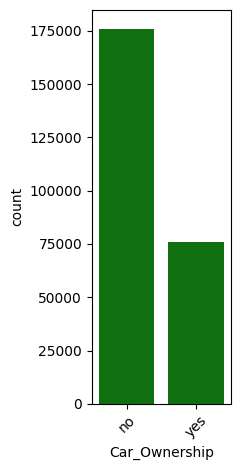

In [50]:
categoricals = ['Married/Single', 'House_Ownership', 'Car_Ownership']
plt.figure(figsize=(15, 5))
for i in range(0, len(categoricals)):
    plt.subplot(1, len(categoricals), i+1)
    sns.countplot(x=df[features[i]], color='green')
    plt.xticks(rotation=45)
    plt.tight_layout()  
    plt.show()

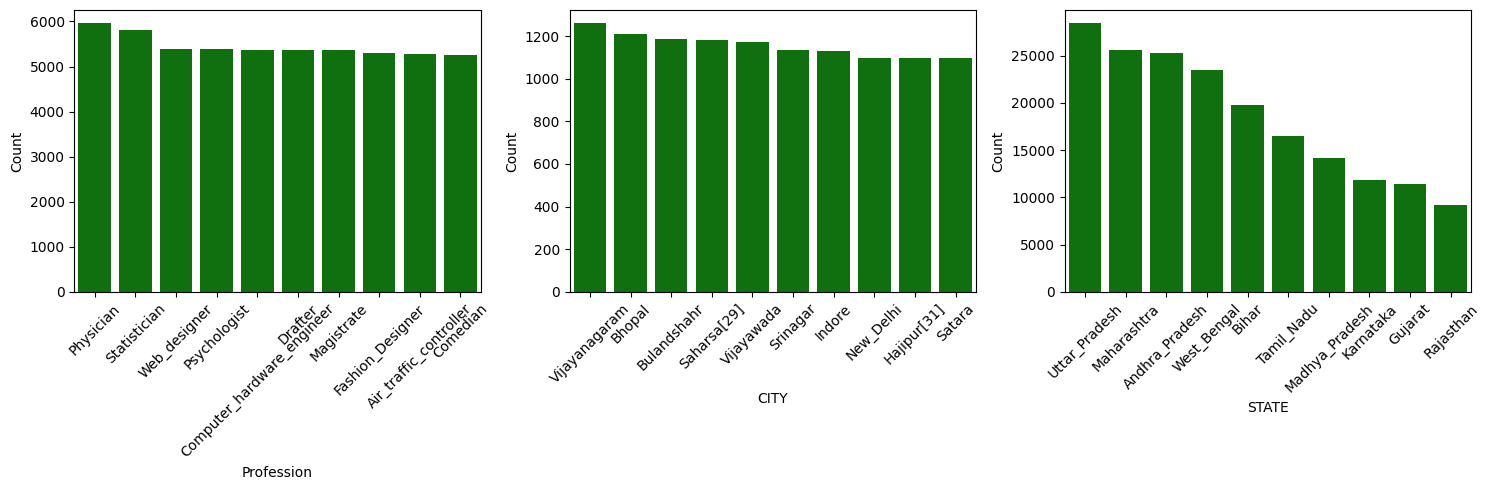

In [ ]:
categoricals = ['Profession', 'CITY', 'STATE']
plt.figure(figsize=(15, 5))

for i in range(len(categoricals)):
    plt.subplot(1, len(categoricals), i+1)
    top_10_data = df[categoricals[i]].value_counts().head(10)
    
    sns.barplot(x=top_10_data.index, y=top_10_data.values, color='green')
    plt.xticks(rotation=45)
    plt.xlabel(categoricals[i])
    plt.ylabel('Count')
    plt.tight_layout()

plt.show()


# 2. Multivariate Analysis

<Axes: >

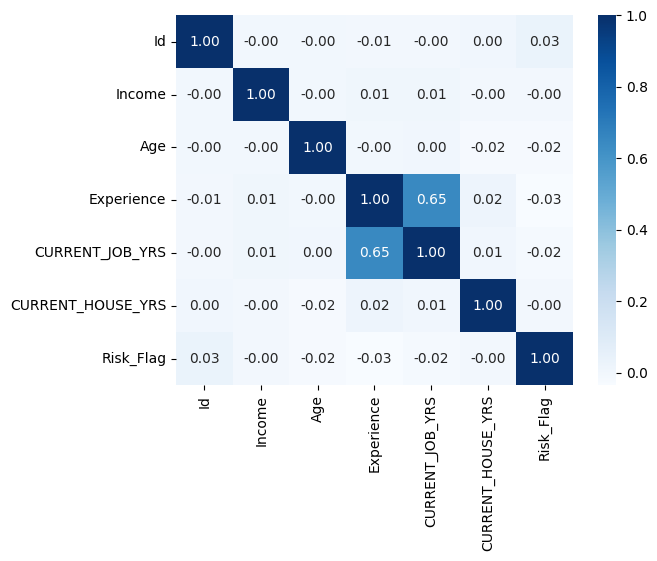

In [17]:
df = df.select_dtypes(exclude=['object'])
df_corr = df.corr()

sns.heatmap(df_corr, cmap='Blues', annot=True, fmt='.2f')

Bedasarkan hasil analisis multivariat, fitur/variabel experience dan current job years memiliki hubungan <br>yang kuat sehingga kedua fitur/variabel ini perlu untuk didrop karena akan menyebabkan hasil, tidak menjadi akurat.

Sehingga kami memutuskan untuk menggunakan fitur seperti id, income, age, current house years, car ownership dan risk_flag.

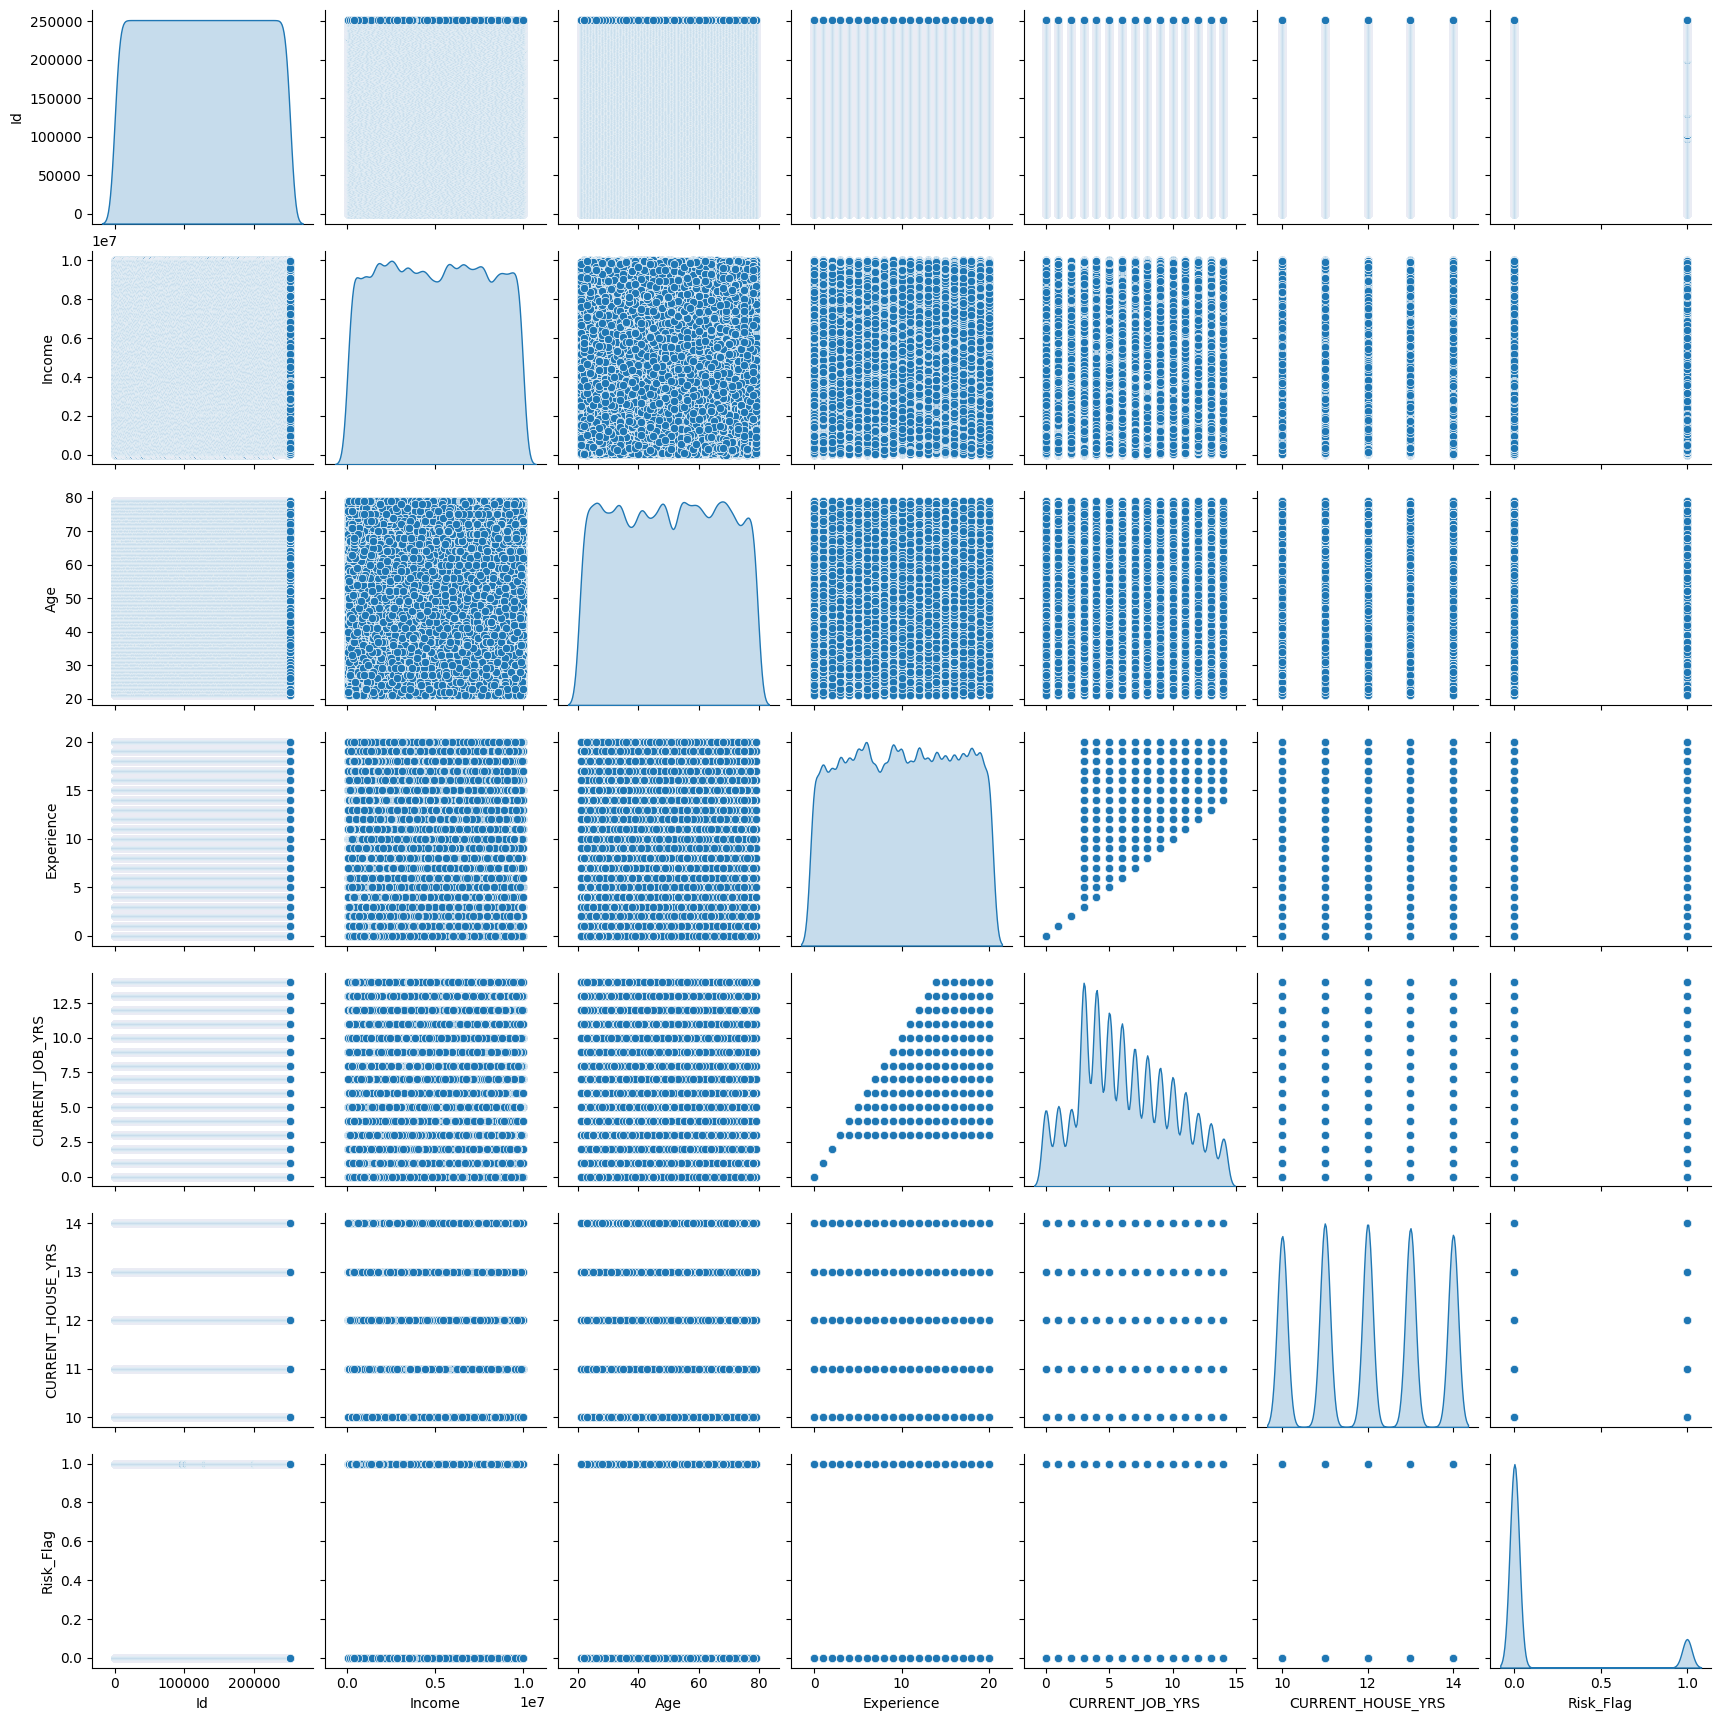

In [ ]:
sns.pairplot(df, diag_kind = 'kde')

In [ ]:
print(df.columns)

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')


In [30]:
print(categoricals)

['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']


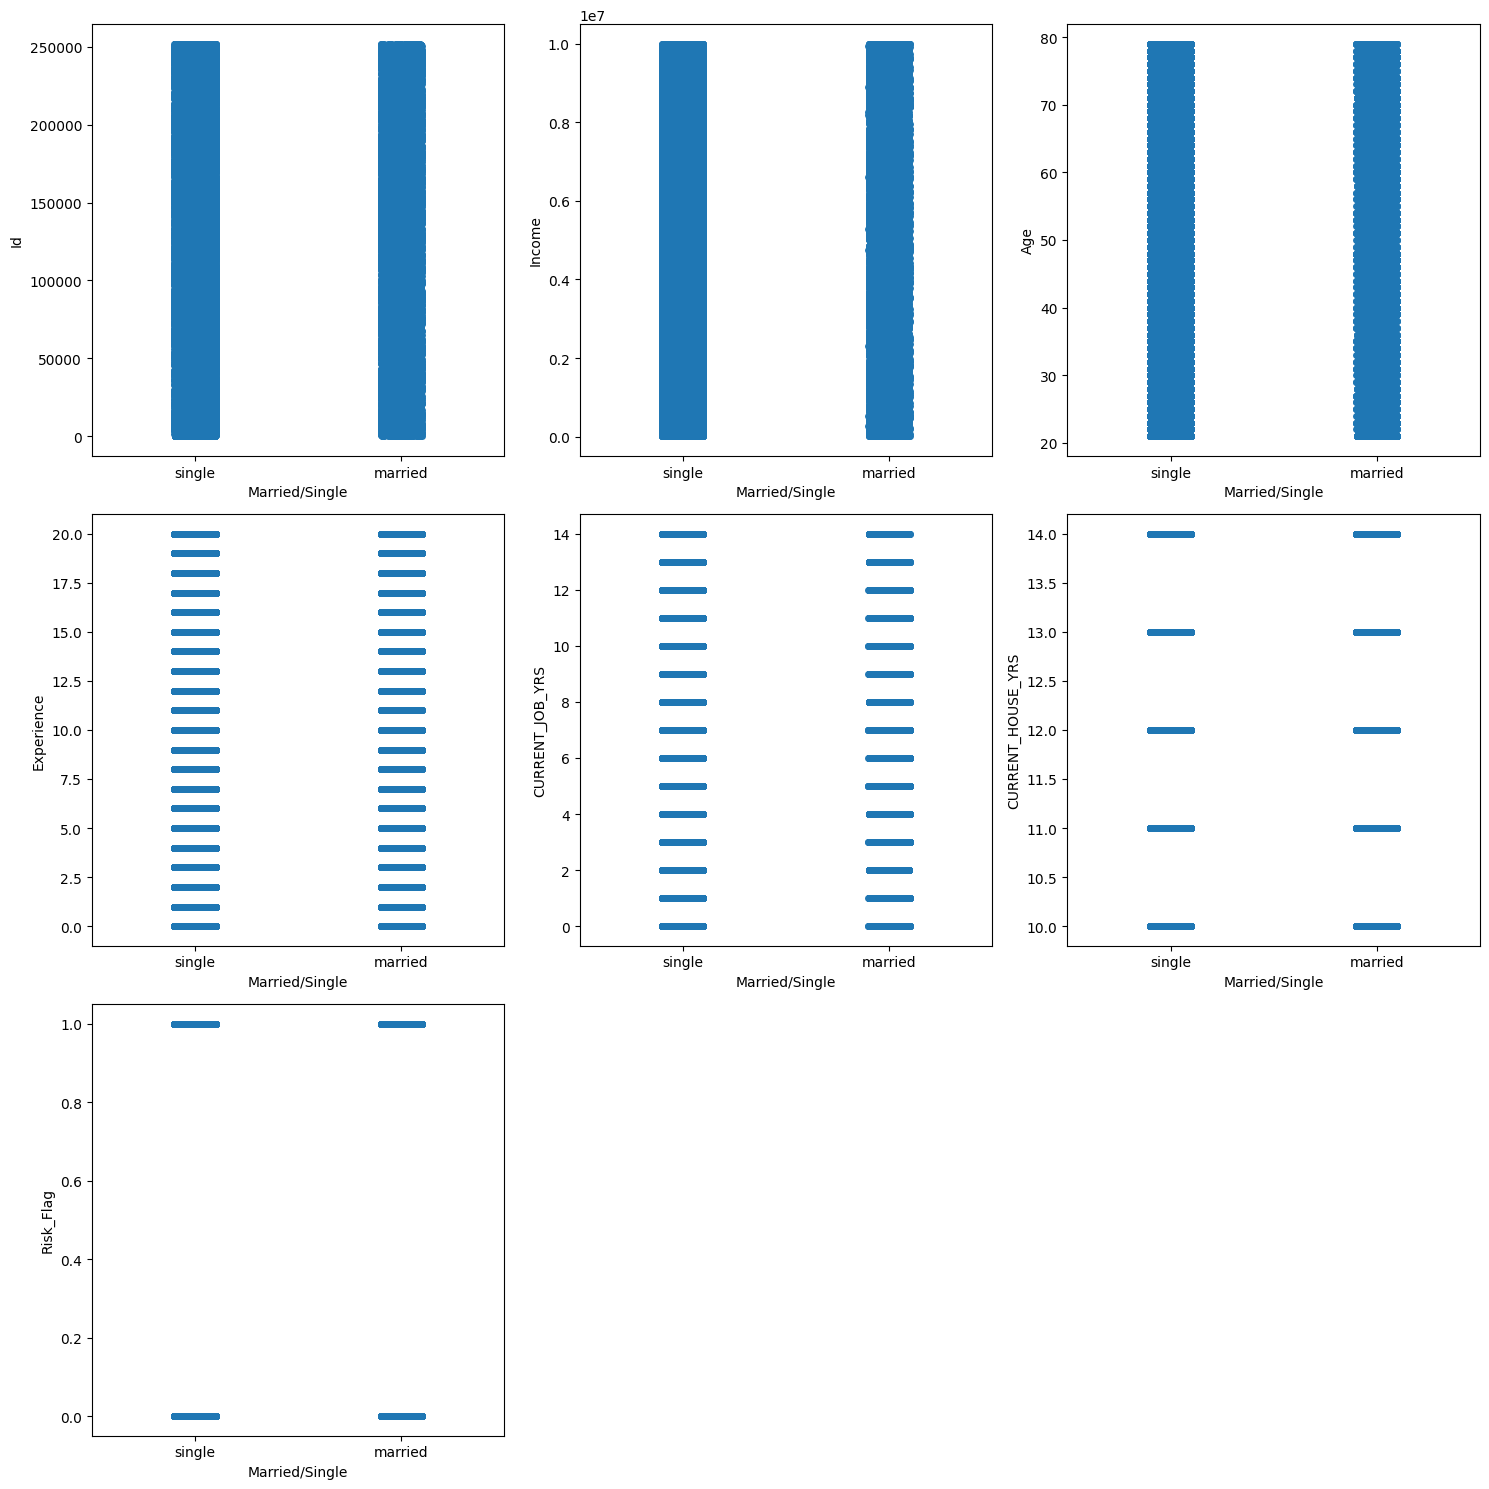

In [29]:
fig=plt.figure(figsize=(15,15)) #numerical dan cats
for i in range(0, len(numericals)): #untuk setiap kolom numerik
  ax=fig.add_subplot(3,3, i+1)
  sns.stripplot(ax=ax, data=df, x='Married/Single' , y=numericals[i]) #x nya data apa yang harus korelasikan dan dilihat visualisasinya
  plt.tight_layout()

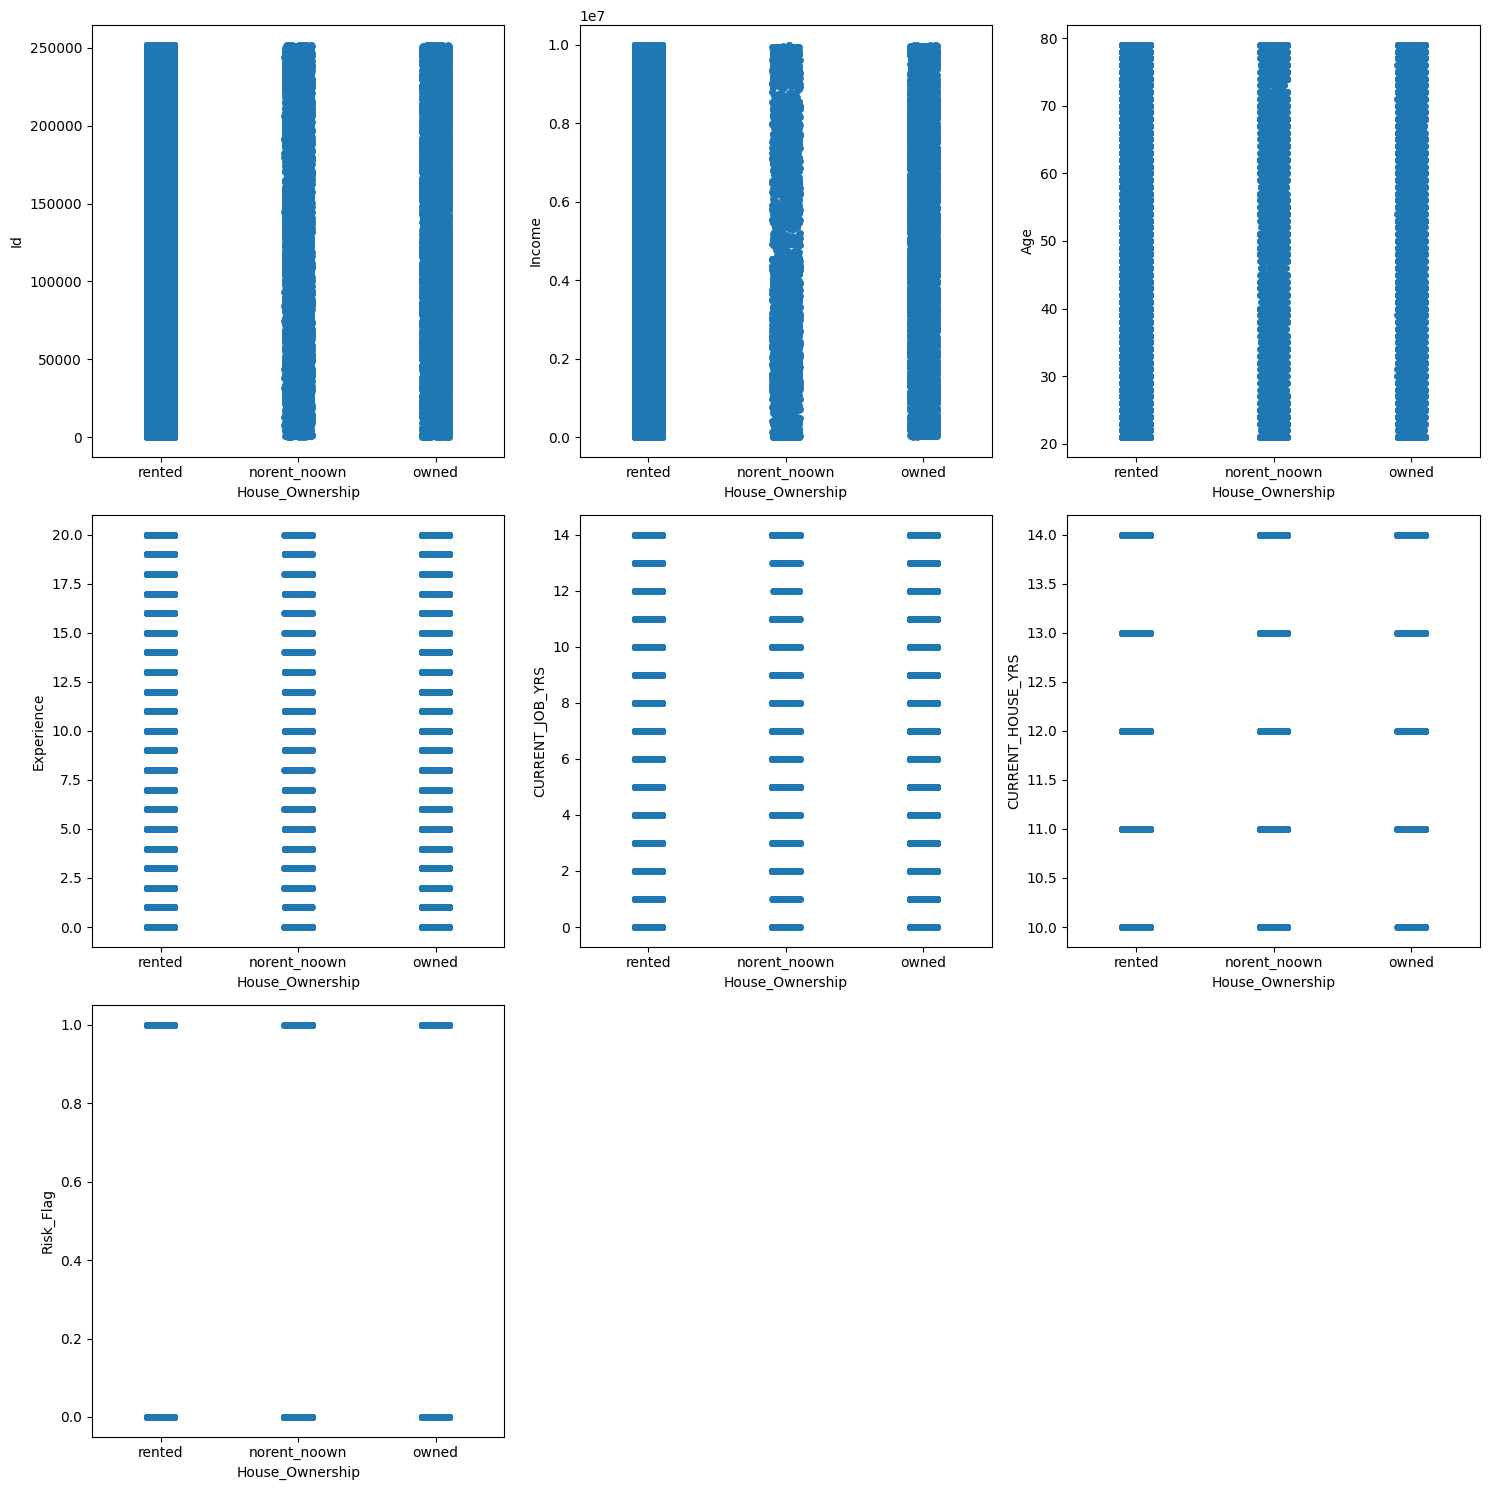

In [32]:
fig=plt.figure(figsize=(15,15)) #numerical dan cats
for i in range(0, len(numericals)): #untuk setiap kolom numerik
  ax=fig.add_subplot(3,3, i+1) 
  sns.stripplot(ax=ax, data=df, x='House_Ownership' , y=numericals[i]) #x nya data apa yang harus korelasikan dan dilihat visualisasinya
  plt.tight_layout()

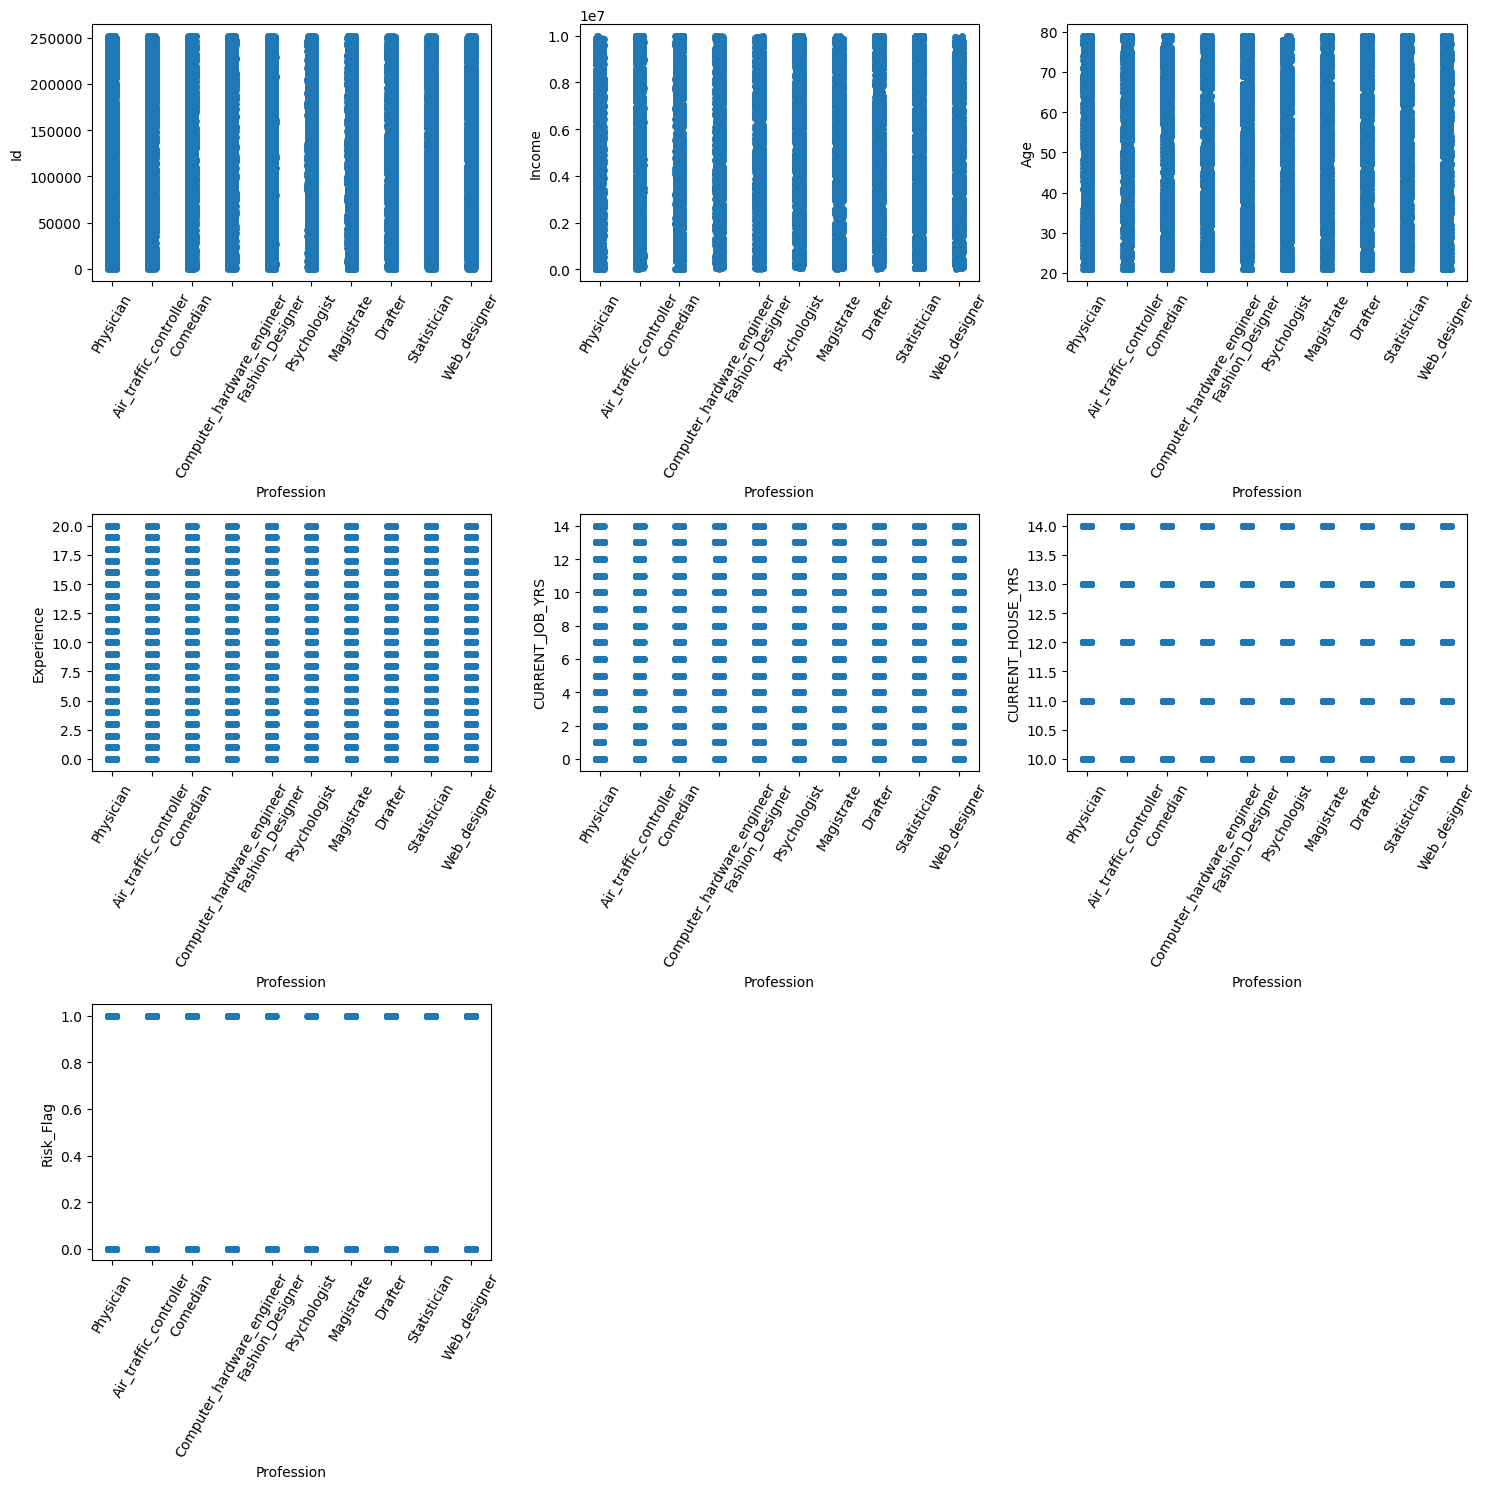

In [58]:
fig=plt.figure(figsize=(15,15)) #numerical dan cats
top_10_profession = df['Profession'].value_counts().head(10)

for i in range(0, len(numericals)): #untuk setiap kolom numerik
  ax=fig.add_subplot(3,3, i+1)
  sns.stripplot(data=df[df['Profession'].isin(top_10_profession.index)], x='Profession' , y=numericals[i], ax=ax) #x nya data apa yang harus korelasikan dan dilihat visualisasinya
  plt.xticks(rotation=60) 
plt.tight_layout()

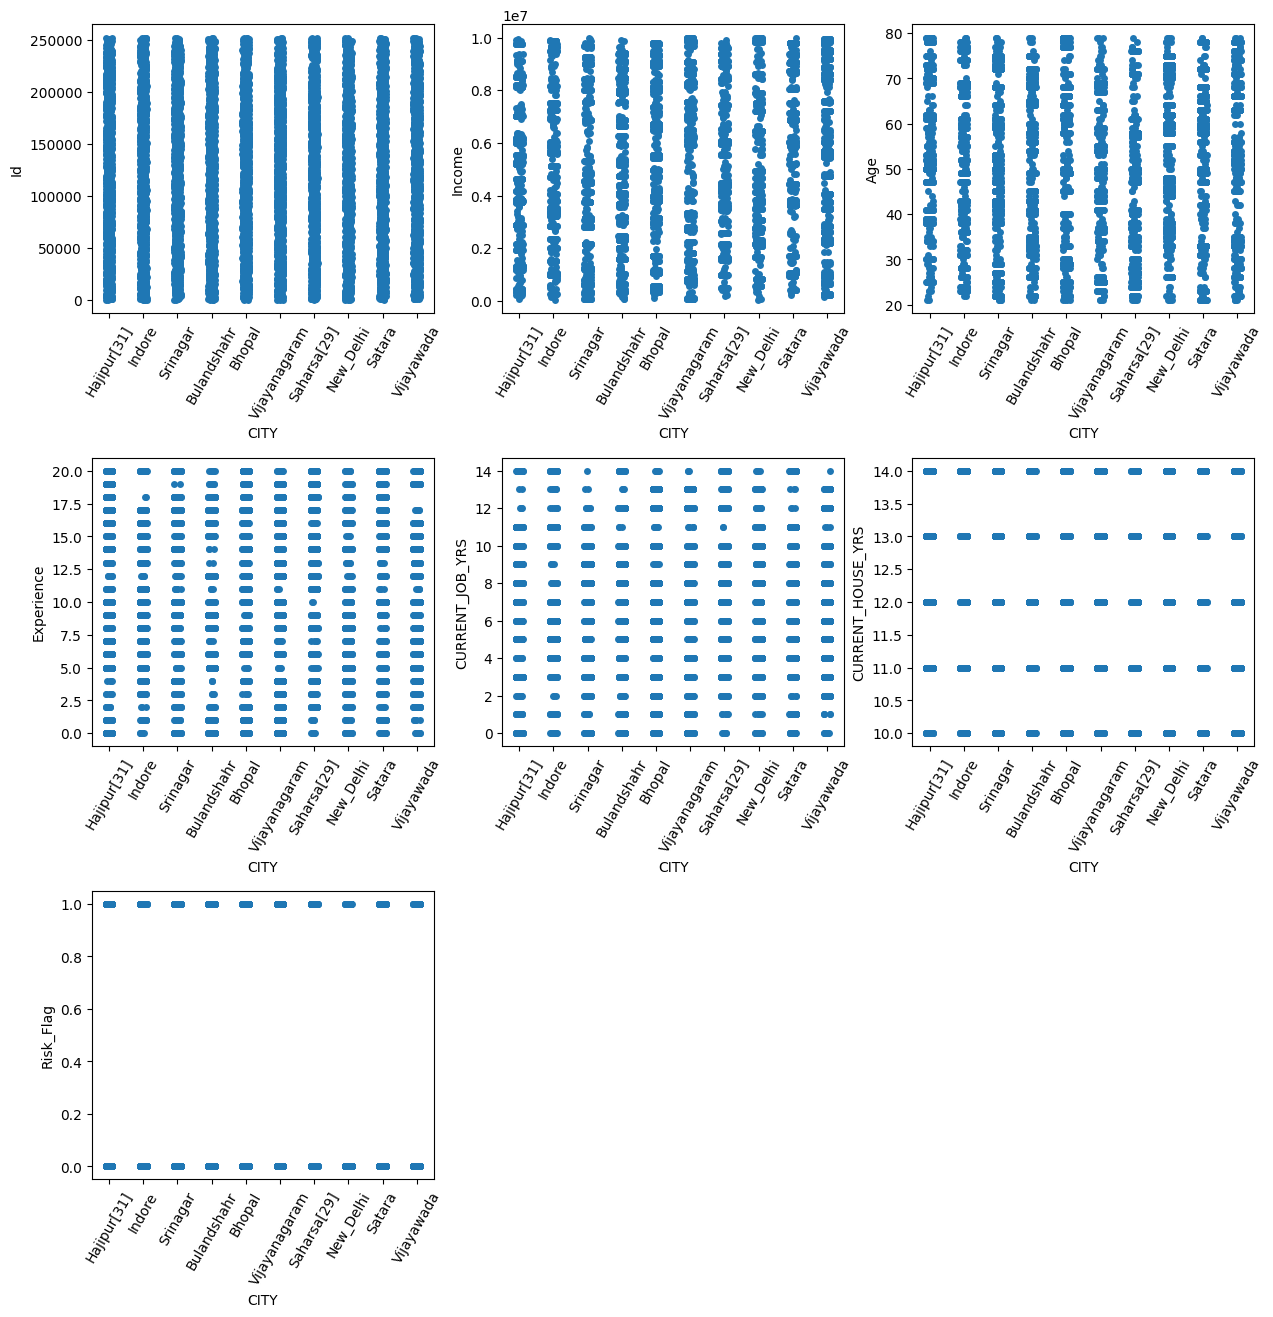

In [63]:
fig=plt.figure(figsize=(15,15)) #numerical dan cats
top_10_city = df['CITY'].value_counts().head(10)

for i in range(0, len(numericals)): #untuk setiap kolom numerik
  ax=fig.add_subplot(3,3, i+1)
  sns.stripplot(data=df[df['CITY'].isin(top_10_city.index)], x='CITY' , y=numericals[i], ax=ax) #x nya data apa yang harus korelasikan dan dilihat visualisasinya
  plt.xticks(rotation=60)
plt.subplots_adjust(hspace=0.5)

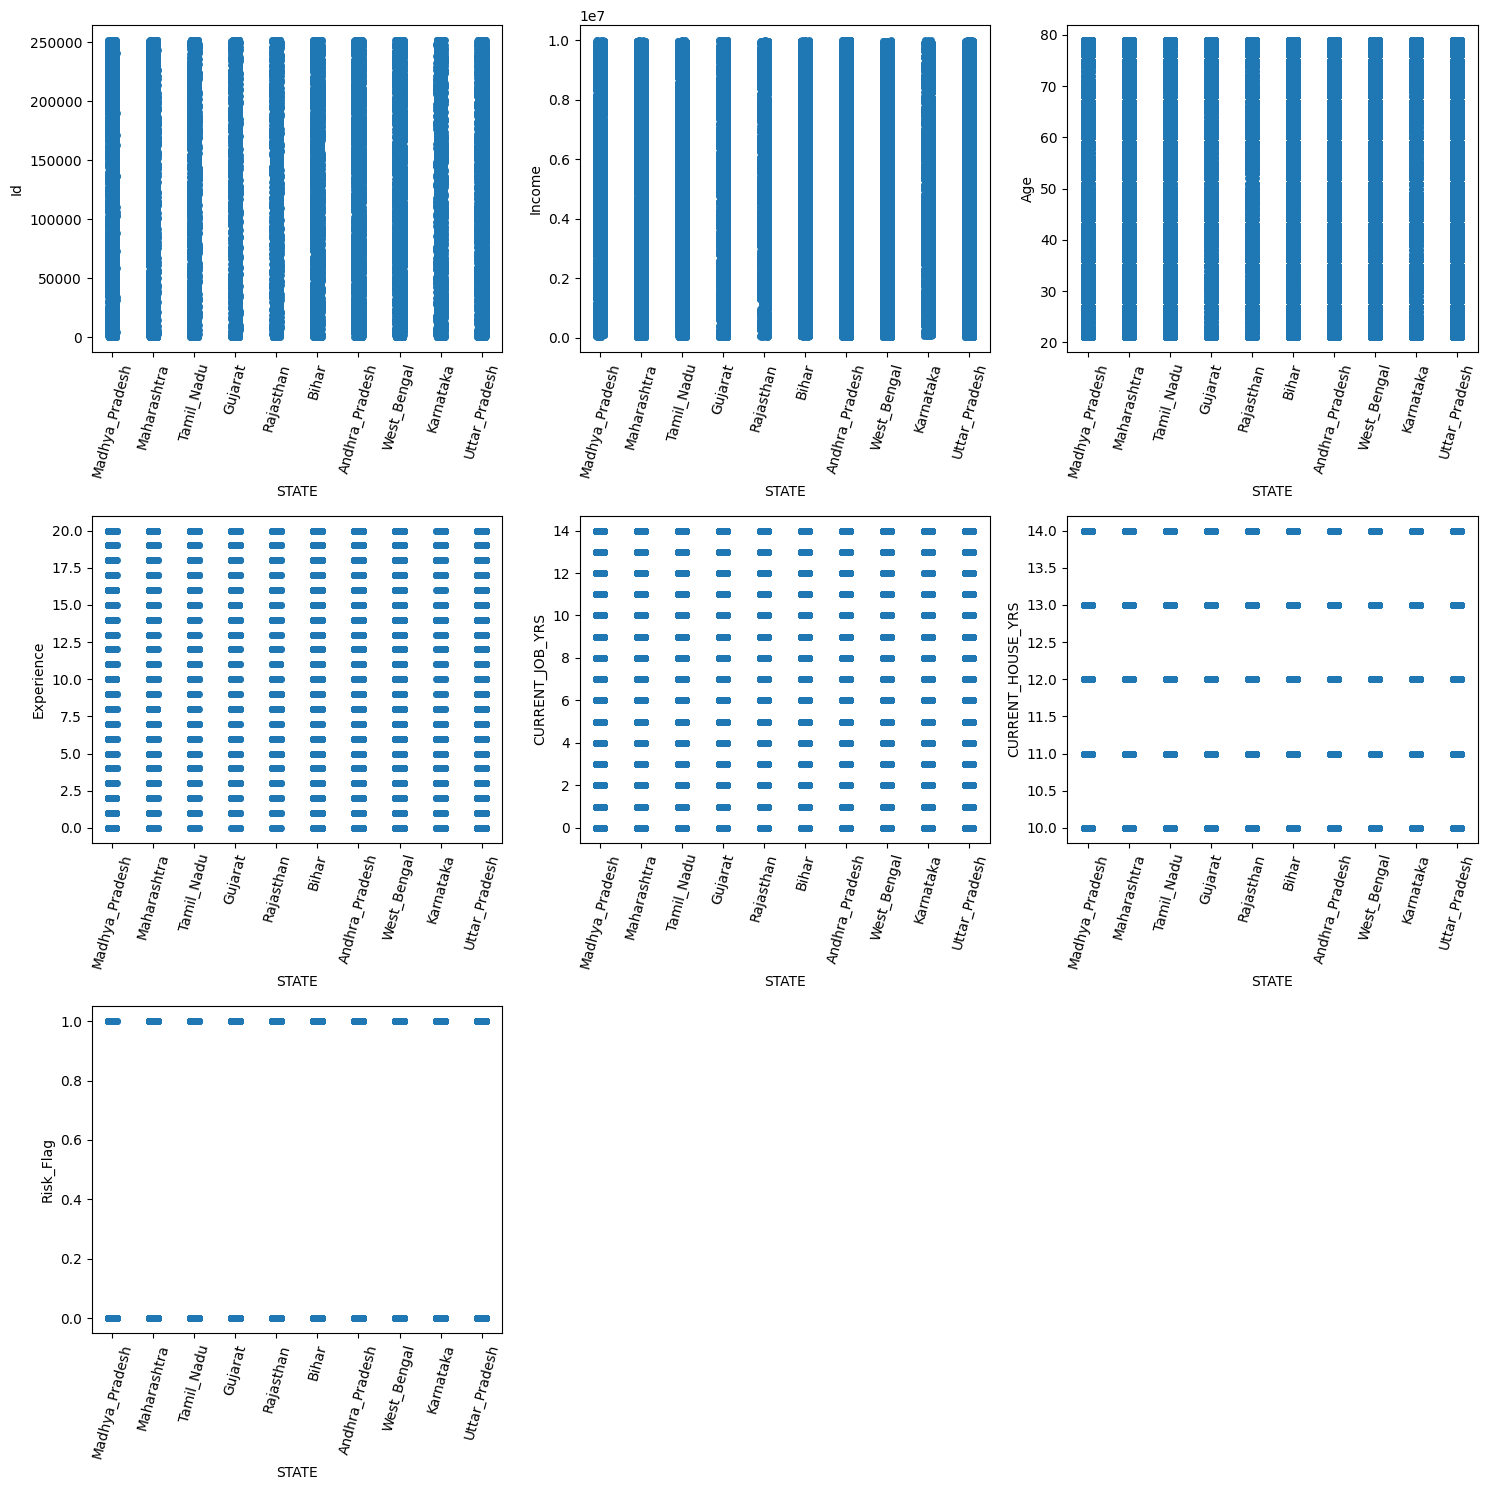

In [82]:
fig=plt.figure(figsize=(15,15)) #numerical dan cats
top_10_state = df['STATE'].value_counts().head(10)

for i in range(0, len(numericals)): #untuk setiap kolom numerik
  ax=fig.add_subplot(3,3, i+1)
  sns.stripplot(data=df[df['STATE'].isin(top_10_state.index)], x='STATE' , y=numericals[i], ax=ax) #x nya data apa yang harus korelasikan dan dilihat visualisasinya
  ax.set_xticklabels(ax.get_xticklabels(), rotation=75) 
plt.tight_layout()


plt.subplots_adjust(hspace=0.5)
plt.show()

# 4. Business Insight

In [118]:
# Proporsi income terhadap risk flag

def income_category(income):
    if income > 4.997117e+06:
        return 'Upper_mean'
    elif income == 4.997117e+06:
        return 'Mean'
    else:
        return 'Lower_mean'

# Menerapkan fungsi income_category pada kolom "Income" untuk membuat kolom baru "Income_Category"
df['Income_Category'] = df['Income'].apply(income_category)

In [121]:
df.drop('age_category', axis=1, inplace=True)

In [122]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Income_Category
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,Lower_mean
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0,Upper_mean
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0,Lower_mean
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1,Upper_mean
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,Upper_mean


In [126]:
# Proporsi feature/Variabel kategori income_category
proporsi_income_category = df['Income_Category'].value_counts(normalize=True)
print("Proporsi income category:")
print(proporsi_income_category)

Proporsi income category:
Income_Category
Upper_mean    0.500333
Lower_mean    0.499667
Name: proportion, dtype: float64


In [113]:
# Proporsi feature/variabel kategori Married/single
proporsi_married_single = df['Married/Single'].value_counts(normalize=True)
print("Proporsi Married/Single:")
print(proporsi_married_single)

Proporsi Married/Single:
Married/Single
single     0.897905
married    0.102095
Name: proportion, dtype: float64


In [106]:
# Proporsi feature/variabel kategori House Ownership
proporsi_house_owner = df['House_Ownership'].value_counts(normalize=True)
print("Proporsi House Owner:")
print(proporsi_house_owner)

Proporsi House Owner:
House_Ownership
rented          0.920230
owned           0.051262
norent_noown    0.028508
Name: proportion, dtype: float64


In [95]:
# Proporsi feature/variabel kategori 
proporsi_car_owner = df['Car_Ownership'].value_counts(normalize=True)
print("Proporsi Car Owner:")
print(proporsi_car_owner)

Proporsi Car Owner:
Car_Ownership
no     0.698413
yes    0.301587
Name: proportion, dtype: float64


In [96]:
# Proporsi Risk Flag
proporsi_risk_flag = df['Risk_Flag'].value_counts(normalize=True)
print("Proporsi Risk Flag:")
print(proporsi_risk_flag)

Proporsi Risk Flag:
Risk_Flag
0    0.877
1    0.123
Name: proportion, dtype: float64


Car_Ownership        no       yes
Risk_Flag                        
0              0.694282  0.305718
1              0.727868  0.272132


<Figure size 800x600 with 0 Axes>

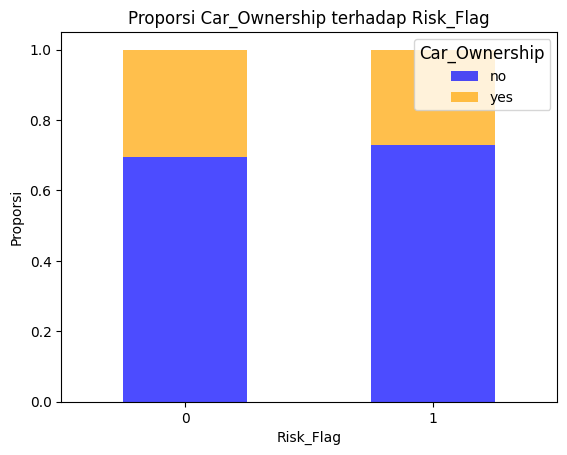

In [115]:
# Proporsi house ownership terhadap risk_flag

proporsi_car_ownership = df.groupby(['Risk_Flag', 'Car_Ownership']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
print(proporsi_car_ownership)

# Stacked bar

plt.figure(figsize=(8, 6))
proporsi_car_ownership.plot(kind='bar', stacked=True, color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Risk_Flag')
plt.ylabel('Proporsi')
plt.title('Proporsi Car_Ownership terhadap Risk_Flag')
plt.xticks(rotation=0)
plt.legend(title='Car_Ownership', title_fontsize='12')
plt.show()

Grafik diatas menunjukkan proporsi resiko gagal bayar dengan nasabah yang memiliki mobil <br>
berdasarkan grafik diatas terlihat bahwa proporsi nasabah yang memiliki resiko gagal bayar tinggi adalah <br>
nasabah yang tidak memiliki mobil daripada nasabah yang memiliki mobil, sehingga perusahaan perlu memperhatikan aset nasabah yang dimiliki.

Married/Single   married    single
Risk_Flag                         
0               0.104487  0.895513
1               0.085043  0.914957


<Figure size 800x600 with 0 Axes>

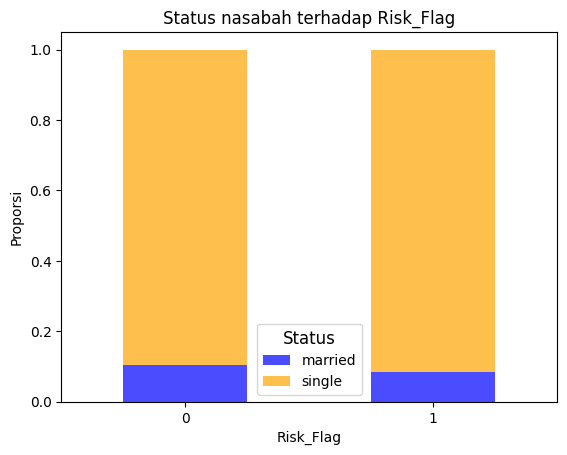

In [133]:
# Proporsi Married/Single terhadap risk_flag

proporsi_married_status = df.groupby(['Risk_Flag', 'Married/Single']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
print(proporsi_married_status)

# Stacked bar

plt.figure(figsize=(8, 6))
proporsi_married_status.plot(kind='bar', stacked=True, color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Risk_Flag')
plt.ylabel('Proporsi')
plt.title('Status nasabah terhadap Risk_Flag')
plt.xticks(rotation=0)
plt.legend(title='Status', title_fontsize='12')
plt.show()

Grafik diatas menunjukkan proporsi resiko gagal bayar dengan status nasabah single atau menikah <br>
berdasarkan grafik diatas terlihat bahwa nasabah yang memiliki resiko gagal bayar tinggi adalah<br>nasabah dengan status single namun jika dilhat dengan status nasabah terutama nasabah yang sudah menikah memiliki<br>resiko gagal bayar yang juga tinggi.

Income_Category  Lower_mean  Upper_mean
Risk_Flag                              
0                  0.499398    0.500602
1                  0.501581    0.498419


<Figure size 800x600 with 0 Axes>

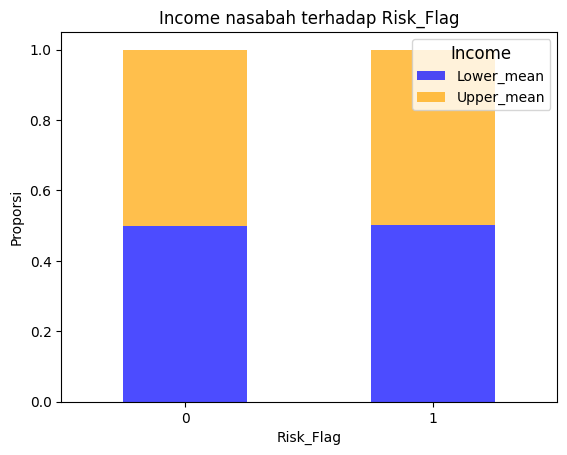

In [132]:
# Proporsi Income terhadap risk_flag

proporsi_income = df.groupby(['Risk_Flag', 'Income_Category']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
print(proporsi_income)

# Stacked bar

plt.figure(figsize=(8, 6))
proporsi_income.plot(kind='bar', stacked=True, color=['blue', 'orange'], alpha=0.7)
plt.xlabel('Risk_Flag')
plt.ylabel('Proporsi')
plt.title('Income nasabah terhadap Risk_Flag')
plt.xticks(rotation=0)
plt.legend(title='Income', title_fontsize='12')
plt.show()

Grafik diatas menunjukkan proporsi resiko gagal bayar berdasarkan pendapatan nasabah <br> yang sudah diklasifikasikan, berdasarkan data rata-rata pendapatan nasabah berkisar 4.997117e+06, jika dibawah rata-<br>rata termasuk pendapatan dibawah rata-rata sedangkan diatas rata-rata termasuk pendapatan diatas rata-rata. Berdasarkan grafik diatas tidak ada perbedaan yang signifikan masing-masing proporsi nasabah<br>dengan pendapatan diatas rata-rata maupun dibawah rata-rata.

House_Ownership  norent_noown     owned    rented
Risk_Flag                                        
0                    0.029271  0.053203  0.917526
1                    0.023067  0.037424  0.939508


<Figure size 800x600 with 0 Axes>

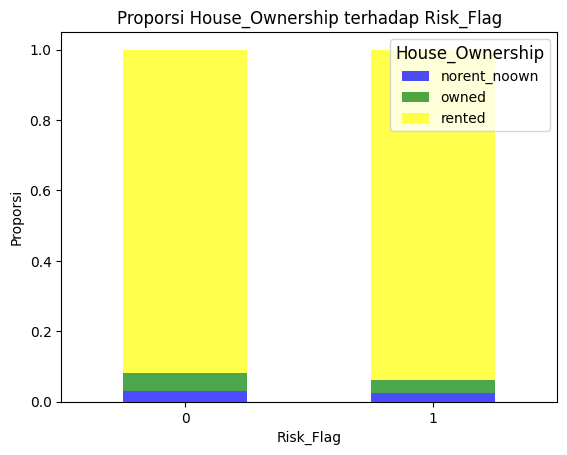

In [141]:
# Proporsi house ownership terhadap risk_flag

proporsi_house_ownership = df.groupby(['Risk_Flag', 'House_Ownership']).size().unstack(fill_value=0).apply(lambda x: x / x.sum(), axis=1)
print(proporsi_house_ownership)

# Stacked bar

plt.figure(figsize=(8, 6))
proporsi_house_ownership.plot(kind='bar', stacked=True, color=['blue', 'green', 'yellow'], alpha=0.7)
plt.xlabel('Risk_Flag')
plt.ylabel('Proporsi')
plt.title('Proporsi House_Ownership terhadap Risk_Flag')
plt.xticks(rotation=0)
plt.legend(title='House_Ownership', title_fontsize='12')
plt.show()

Grafik diatas menunjukkan proporsi resiko gagal bayar dengan status rumah nasabah <br>
berdasarkan grafik diatas terlihat bahwa proporsi nasabah yang memiliki resiko gagal bayar adalah <br>
nasabah yang memiliki rumah rented(sewa), daripada rumah milik pribadi, atau tidak memiliki rumah/sewa.<br> Sehingga perusahaan perlu menghindari nasabah dengan status kepemilikan sewa.

In [142]:
#groupby profesi untuk mencari rasio default per profesi
rasio_profesi= df.groupby('Profession')['Risk_Flag'].value_counts(normalize=True)[:,1]
print('rasio default berdasarkan profesi:')
print(rasio_profesi)

rasio default berdasarkan profesi:
Profession
Air_traffic_controller        0.135391
Analyst                       0.121465
Architect                     0.131200
Army_officer                  0.152113
Artist                        0.122609
Aviator                       0.134931
Biomedical_Engineer           0.127560
Chartered_Accountant          0.153572
Chef                          0.121467
Chemical_engineer             0.111623
Civil_engineer                0.135832
Civil_servant                 0.115794
Comedian                      0.119604
Computer_hardware_engineer    0.128444
Computer_operator             0.124048
Consultant                    0.125208
Dentist                       0.109578
Design_Engineer               0.106999
Designer                      0.109178
Drafter                       0.112894
Economist                     0.099278
Engineer                      0.118083
Fashion_Designer              0.115385
Financial_Analyst             0.103155
Firefighter       

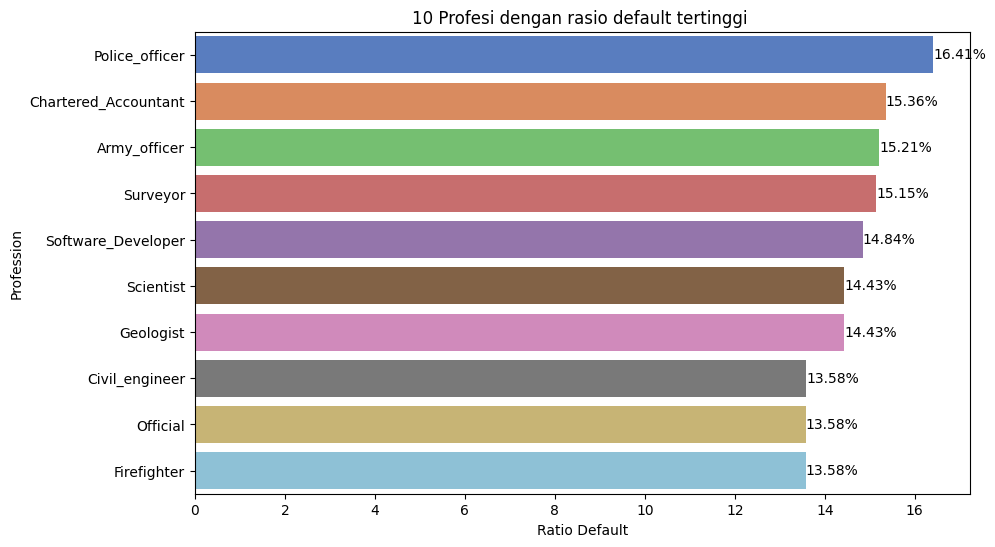

In [143]:
df_rasio_profesi = rasio_profesi.reset_index(name='Ratio')
df_rasio_profesi['Ratio'] *= 100
# Urutkan DataFrame berdasarkan kolom 'Ratio' secara menurun
df_rasio_profesi_sorted = df_rasio_profesi.sort_values(by='Ratio', ascending=False)

# Ambil 10 baris teratas
top_10_rasio_profesi = df_rasio_profesi_sorted.head(10)

# Membuat horizontal bar chart dengan Seaborn
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
sns.barplot(x='Ratio', y='Profession', data=top_10_rasio_profesi, palette='muted')  # palette='muted' untuk warna yang berbeda

for index, value in enumerate(top_10_rasio_profesi['Ratio']):
    plt.text(value, index, f'{value:.2f}%', va='center')
# Memberikan label pada sumbu x dan y
plt.xlabel('Ratio Default')
plt.ylabel('Profession')
plt.title('10 Profesi dengan rasio default tertinggi ')
plt.show()

Visualisasi pekerjaan diatas adalah nilai rasio dari keseluruhan pengajuan pinjaman yang dilakukan dan dikelompokkan masing-masing profesi, didapatkan bahwa yang memiliki rasio untuk default tertinggi ada di pekerjaan **'Police_Officer'**, dimana dari keseluruhan pengajuan pinjaman yang dilakukan oleh customer yang bekerja sebagai **'Police_Officer'**, sekitar **16.41%** terjadi gagal bayar.Kemudian selanjutnya disusul oleh **'Chartered_Accountant'** denagn rasio **15,36%** dan **Army_Officer** dengan rasio **15,21%**  

# Business Recommendation

1. Perusahaan perlu mengurangi/membatasi nasabah yang tidak memiliki mobil karena memiliki resiko gagal bayar lebih tinggi daripada nasabah yang memiliki mobil.<br>
2. Perusahaan perlu mengurangi/membatasi nasabah yang memiliki status single daripada status menikah.
3. Nasabah dengan pendapatan diatas rata-rata maupun dibawah rata-rata, tidak ada perbedaan resiko gagal bayar sehingga perusahaan dapat menerima/menawarkan pinjaman kepada dua nasabah dengan dua kategori.
4. Perusahaan perlu mengurangi/membatasi nasabah dengan status rumah rented(sewa)
5. Mengurangi penyetujuan pinjaman yang dilakukan oleh customer dengan pekerjaan Police_Officer, Chartered_Accountant, dan Army_Officer. Karena ketiga pekerjaan diatas adalah pekerjaan yang memiliki rasio default yang paling tinggi dari pekerjaan lainnya.

# Data Pre-processing

### 1. Handling Missing Values

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [7]:
df.isna().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### 2. Handling duplicated data

In [8]:
df.duplicated().sum()

0

### 3. Feature Transformation

In [11]:
print(numericals)

['Id', 'Income', 'Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']


In [89]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['Income_norm'] = MinMaxScaler().fit_transform(df['Income'].values.reshape(len(df), 1))
df['Income_std'] = StandardScaler().fit_transform(df['Income'].values.reshape(len(df), 1))

In [90]:
df[['Income', 'Income_norm', 'Income_std']].describe()

,Income,Income_norm,Income_std
count,2.520000e+05,252000.000000,2.520000e+05
mean,4.997117e+06,0.499198,4.436663e-17
std,2.878311e+06,0.288130,1.000002e+00
min,1.031000e+04,0.000000,-1.732550e+00
25%,2.503015e+06,0.249529,-8.665174e-01
50%,5.000694e+06,0.499557,1.243035e-03
75%,7.477502e+06,0.747495,8.617520e-01
max,9.999938e+06,1.000000,1.738114e+00


In [91]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['Age_norm'] = MinMaxScaler().fit_transform(df['Age'].values.reshape(len(df), 1))
df['Age_std'] = StandardScaler().fit_transform(df['Age'].values.reshape(len(df), 1))

In [92]:
df[['Age', 'Age_norm', 'Age_std']].describe()

,Age,Age_norm,Age_std
count,252000.000000,252000.000000,2.520000e+05
mean,49.954071,0.499208,-1.699663e-16
std,17.063855,0.294204,1.000002e+00
min,21.000000,0.000000,-1.696811e+00
25%,35.000000,0.241379,-8.763612e-01
50%,50.000000,0.500000,2.691576e-03
75%,65.000000,0.758621,8.817444e-01
max,79.000000,1.000000,1.702194e+00


In [93]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['Exp_norm'] = MinMaxScaler().fit_transform(df['Experience'].values.reshape(len(df), 1))
df['Exp_std'] = StandardScaler().fit_transform(df['Experience'].values.reshape(len(df), 1))

In [94]:
df[['Experience', 'Exp_norm', 'Exp_std']].describe()

,Experience,Exp_norm,Exp_std
count,252000.000000,252000.000000,2.520000e+05
mean,10.084437,0.504222,1.169576e-16
std,6.002590,0.300129,1.000002e+00
min,0.000000,0.000000,-1.680018e+00
25%,5.000000,0.250000,-8.470421e-01
50%,10.000000,0.500000,-1.406671e-02
75%,15.000000,0.750000,8.189087e-01
max,20.000000,1.000000,1.651884e+00


In [95]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['Current_job_norm'] = MinMaxScaler().fit_transform(df['CURRENT_JOB_YRS'].values.reshape(len(df), 1))
df['Current_job_std'] = StandardScaler().fit_transform(df['CURRENT_JOB_YRS'].values.reshape(len(df), 1))

In [96]:
df[['CURRENT_JOB_YRS', 'Current_job_norm', 'Current_job_std']].describe()

,CURRENT_JOB_YRS,Current_job_norm,Current_job_std
count,252000.000000,252000.000000,2.520000e+05
mean,6.333877,0.452420,-7.818790e-17
std,3.647053,0.260504,1.000002e+00
min,0.000000,0.000000,-1.736714e+00
25%,3.000000,0.214286,-9.141308e-01
50%,6.000000,0.428571,-9.154724e-02
75%,9.000000,0.642857,7.310363e-01
max,14.000000,1.000000,2.102009e+00


In [97]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['Current_house_norm'] = MinMaxScaler().fit_transform(df['CURRENT_HOUSE_YRS'].values.reshape(len(df), 1))
df['Current_house_std'] = StandardScaler().fit_transform(df['CURRENT_HOUSE_YRS'].values.reshape(len(df), 1))

In [99]:
df[['CURRENT_JOB_YRS', 'Current_house_norm', 'Current_house_std']].describe()

,CURRENT_JOB_YRS,Current_house_norm,Current_house_std
count,252000.000000,252000.000000,2.520000e+05
mean,6.333877,0.499448,-5.072486e-16
std,3.647053,0.349759,1.000002e+00
min,0.000000,0.000000,-1.427981e+00
25%,3.000000,0.250000,-7.132018e-01
50%,6.000000,0.500000,1.577052e-03
75%,9.000000,0.750000,7.163559e-01
max,14.000000,1.000000,1.431135e+00


In [100]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
df['Risk_Flag_norm'] = MinMaxScaler().fit_transform(df['Risk_Flag'].values.reshape(len(df), 1))
df['Risk_Flag_std'] = StandardScaler().fit_transform(df['Risk_Flag'].values.reshape(len(df), 1))

In [101]:
df[['Risk_Flag', 'Risk_Flag_norm', 'Risk_Flag_std']].describe()

,Risk_Flag,Risk_Flag_norm,Risk_Flag_std
count,252000.000000,252000.000000,2.520000e+05
mean,0.123000,0.123000,-6.857301e-17
std,0.328438,0.328438,1.000002e+00
min,0.000000,0.000000,-3.745008e-01
25%,0.000000,0.000000,-3.745008e-01
50%,0.000000,0.000000,-3.745008e-01
75%,0.000000,0.000000,-3.745008e-01
max,1.000000,1.000000,2.670221e+00


### 3b. Splitting data

### 4. Handling Outliers

Outlier tidak di-handle karena setiap variabel/fitur tidak memimiliki nilai ekstrim sehingga dapat dilanjutkan ke model.

### 4a. Log Transformation

<Axes: xlabel='CURRENT_JOB_YRS', ylabel='Density'>

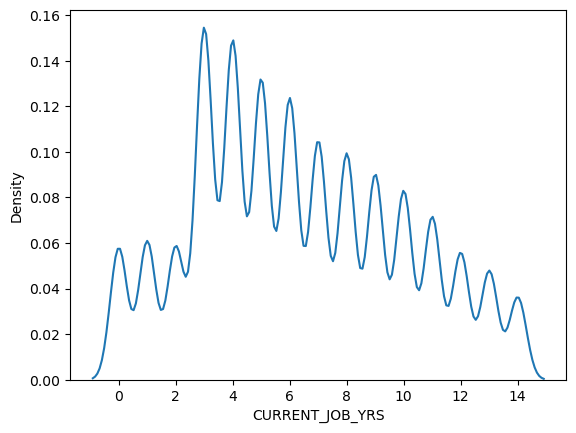

In [102]:
# data asli

sns.kdeplot(df['CURRENT_JOB_YRS'])

<Axes: xlabel='CURRENT_JOB_YRS', ylabel='Density'>

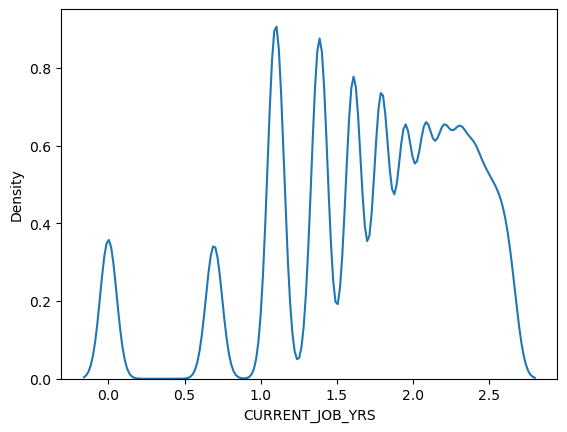

In [104]:
sns.kdeplot(np.log(df['CURRENT_JOB_YRS']))

In [105]:
df['log_job_yrs'] = np.log(df['CURRENT_JOB_YRS'])

<Axes: xlabel='log_job_yrs', ylabel='Density'>

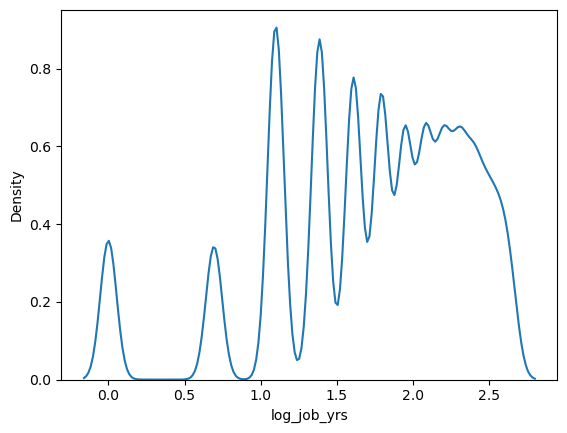

In [106]:
sns.kdeplot(df['log_job_yrs'])

### 5. Feature Encoding

### 1. Variabel/Feature Married/Single

In [107]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Age_std,Exp_norm,Exp_std,Current_job_norm,Current_job_std,Current_house_norm,Current_house_std,Risk_Flag_norm,Risk_Flag_std,log_job_yrs
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,...,-1.579604,0.15,-1.180232,0.214286,-0.914131,0.75,0.716356,0.0,-0.374501,1.098612
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,...,-0.583344,0.50,-0.014067,0.642857,0.731036,0.75,0.716356,0.0,-0.374501,2.197225
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,...,0.940348,0.20,-1.013637,0.285714,-0.639936,0.00,-1.427981,0.0,-0.374501,1.386294
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,...,-0.524740,0.10,-1.346827,0.142857,-1.188325,0.50,0.001577,1.0,2.670221,0.693147
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,-0.173119,0.55,0.152528,0.214286,-0.914131,1.00,1.431135,1.0,2.670221,1.098612


In [108]:
mapping_status = { 'single' : 0, 
                  'married' : 1 }

df['Married/Single'] = df['Married/Single'].map(mapping_status)

In [109]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Age_std,Exp_norm,Exp_std,Current_job_norm,Current_job_std,Current_house_norm,Current_house_std,Risk_Flag_norm,Risk_Flag_std,log_job_yrs
0,1,1303834,23,3,0,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,...,-1.579604,0.15,-1.180232,0.214286,-0.914131,0.75,0.716356,0.0,-0.374501,1.098612
1,2,7574516,40,10,0,rented,no,Software_Developer,Parbhani,Maharashtra,...,-0.583344,0.50,-0.014067,0.642857,0.731036,0.75,0.716356,0.0,-0.374501,2.197225
2,3,3991815,66,4,1,rented,no,Technical_writer,Alappuzha,Kerala,...,0.940348,0.20,-1.013637,0.285714,-0.639936,0.00,-1.427981,0.0,-0.374501,1.386294
3,4,6256451,41,2,0,rented,yes,Software_Developer,Bhubaneswar,Odisha,...,-0.524740,0.10,-1.346827,0.142857,-1.188325,0.50,0.001577,1.0,2.670221,0.693147
4,5,5768871,47,11,0,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,-0.173119,0.55,0.152528,0.214286,-0.914131,1.00,1.431135,1.0,2.670221,1.098612


### 2. House ownership

In [110]:
mapping_house = { 'norent_noown' : 0, 
                 'owned' : 2, 
                 'rented' : 1 }
df['House_Ownership'] = df['House_Ownership'].map(mapping_house)

In [111]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Age_std,Exp_norm,Exp_std,Current_job_norm,Current_job_std,Current_house_norm,Current_house_std,Risk_Flag_norm,Risk_Flag_std,log_job_yrs
0,1,1303834,23,3,0,1,no,Mechanical_engineer,Rewa,Madhya_Pradesh,...,-1.579604,0.15,-1.180232,0.214286,-0.914131,0.75,0.716356,0.0,-0.374501,1.098612
1,2,7574516,40,10,0,1,no,Software_Developer,Parbhani,Maharashtra,...,-0.583344,0.50,-0.014067,0.642857,0.731036,0.75,0.716356,0.0,-0.374501,2.197225
2,3,3991815,66,4,1,1,no,Technical_writer,Alappuzha,Kerala,...,0.940348,0.20,-1.013637,0.285714,-0.639936,0.00,-1.427981,0.0,-0.374501,1.386294
3,4,6256451,41,2,0,1,yes,Software_Developer,Bhubaneswar,Odisha,...,-0.524740,0.10,-1.346827,0.142857,-1.188325,0.50,0.001577,1.0,2.670221,0.693147
4,5,5768871,47,11,0,1,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,-0.173119,0.55,0.152528,0.214286,-0.914131,1.00,1.431135,1.0,2.670221,1.098612


### 3. Car_Ownership

In [112]:
mapping_car = { 'no' : 0, 
               'yes' : 1 }

df['Car_Ownership'] = df['Car_Ownership'].map(mapping_car)

In [113]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Age_std,Exp_norm,Exp_std,Current_job_norm,Current_job_std,Current_house_norm,Current_house_std,Risk_Flag_norm,Risk_Flag_std,log_job_yrs
0,1,1303834,23,3,0,1,0,Mechanical_engineer,Rewa,Madhya_Pradesh,...,-1.579604,0.15,-1.180232,0.214286,-0.914131,0.75,0.716356,0.0,-0.374501,1.098612
1,2,7574516,40,10,0,1,0,Software_Developer,Parbhani,Maharashtra,...,-0.583344,0.50,-0.014067,0.642857,0.731036,0.75,0.716356,0.0,-0.374501,2.197225
2,3,3991815,66,4,1,1,0,Technical_writer,Alappuzha,Kerala,...,0.940348,0.20,-1.013637,0.285714,-0.639936,0.00,-1.427981,0.0,-0.374501,1.386294
3,4,6256451,41,2,0,1,1,Software_Developer,Bhubaneswar,Odisha,...,-0.524740,0.10,-1.346827,0.142857,-1.188325,0.50,0.001577,1.0,2.670221,0.693147
4,5,5768871,47,11,0,1,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,...,-0.173119,0.55,0.152528,0.214286,-0.914131,1.00,1.431135,1.0,2.670221,1.098612


### 4. Profession

In [114]:
def map_of_profession(job):
    if job in ['Biomedical_Engineer', 'Chemical Engineer', 'Computer_hardware_Engineer', 'Civil_Engineer', 'Design_Engineer', 'Engineer', 'Industrial_Engineer', 'Petroleum_Engineer', 'Mechanical_engineer']: 
        return 'engineer' 
    elif job in ['Software_Developer', 'Computer_operator', 'Technology_specialist', 'Web_designer']: 
        return 'technology'
    elif job in ['Air_traffic_controller', 'Aviator', 'Flight_attendant']:
        return 'airlines'
    elif job in ['Dentist', 'Surgeon', 'Psychologist']: 
        return 'healths'
    elif job in ['Politician', 'Lawyer', 'Magistrate']:
        return 'Law'
    elif job in ['Architect', 'Technician', 'Surveyor']:
        return 'contractor'
    elif job in ['Geologist', 'Microbiologist', 'Scientist', 'Statistician', 'Analyst']:
        return 'science'
    elif job in ['Police_officer', 'Army_officer']:
        return 'armed_forces'
    elif job in ['Chartered_Accountant', 'Financial_Analyst', 'Economist']:
        return 'finance'
    else:
        return 'others'
    
df['Profession'] = df['Profession'].map(map_of_profession)

In [115]:
mapping_profession = { 
    'engineer' : 0, 
    'technology': 1, 
    'airlines' : 2, 
    'healths' : 3, 
    'Law' : 4, 
    'contractor' : 5, 
    'science' : 6, 
    'armed_forces' : 7, 
    'finance' : 8, 
    'others' :9 
}

df['Profession'] = df['Profession'].map(mapping_profession)

In [116]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Age_std,Exp_norm,Exp_std,Current_job_norm,Current_job_std,Current_house_norm,Current_house_std,Risk_Flag_norm,Risk_Flag_std,log_job_yrs
0,1,1303834,23,3,0,1,0,0,Rewa,Madhya_Pradesh,...,-1.579604,0.15,-1.180232,0.214286,-0.914131,0.75,0.716356,0.0,-0.374501,1.098612
1,2,7574516,40,10,0,1,0,1,Parbhani,Maharashtra,...,-0.583344,0.50,-0.014067,0.642857,0.731036,0.75,0.716356,0.0,-0.374501,2.197225
2,3,3991815,66,4,1,1,0,9,Alappuzha,Kerala,...,0.940348,0.20,-1.013637,0.285714,-0.639936,0.00,-1.427981,0.0,-0.374501,1.386294
3,4,6256451,41,2,0,1,1,1,Bhubaneswar,Odisha,...,-0.524740,0.10,-1.346827,0.142857,-1.188325,0.50,0.001577,1.0,2.670221,0.693147
4,5,5768871,47,11,0,1,0,9,Tiruchirappalli[10],Tamil_Nadu,...,-0.173119,0.55,0.152528,0.214286,-0.914131,1.00,1.431135,1.0,2.670221,1.098612


In [41]:
df.tail()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Age_std,Exp_norm,Exp_std,Current_job_norm,Current_job_std,Current_house_norm,Current_house_std,Risk_Flag_norm,Risk_Flag_std,log_job_yrs
251995,251996,8154883,43,13,0,1,0,3,Kolkata,West_Bengal,...,-0.407533,0.65,0.485719,0.428571,-0.091547,0.25,-0.713202,0.0,-0.374501,1.791759
251996,251997,2843572,26,10,0,1,0,7,Rewa,Madhya_Pradesh,...,-1.403793,0.50,-0.014067,0.428571,-0.091547,0.25,-0.713202,0.0,-0.374501,1.791759
251997,251998,4522448,46,7,0,1,0,0,Kalyan-Dombivli,Maharashtra,...,-0.231723,0.35,-0.513852,0.500000,0.182647,0.50,0.001577,0.0,-0.374501,1.945910
251998,251999,6507128,45,0,0,1,0,9,Pondicherry,Puducherry,...,-0.290326,0.00,-1.680018,0.000000,-1.736714,0.00,-1.427981,0.0,-0.374501,-inf
251999,252000,9070230,70,17,0,1,0,6,Avadi,Tamil_Nadu,...,1.174762,0.85,1.152099,0.500000,0.182647,0.25,-0.713202,0.0,-0.374501,1.945910


# 5.Class Imbalance

In [135]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Exp_norm,Exp_std,Current_job_norm,Current_job_std,Current_house_norm,Current_house_std,Risk_Flag_norm,Risk_Flag_std,log_job_yrs,Risk_Flag_class
0,1,1303834,23,3,0,1,0,0,0.12,Madhya_Pradesh,...,0.15,-1.180232,0.214286,-0.914131,0.75,0.716356,0.0,-0.374501,1.098612,True
1,2,7574516,40,10,0,1,0,1,0.12,Maharashtra,...,0.50,-0.014067,0.642857,0.731036,0.75,0.716356,0.0,-0.374501,2.197225,True
2,3,3991815,66,4,1,1,0,9,0.13,Kerala,...,0.20,-1.013637,0.285714,-0.639936,0.00,-1.427981,0.0,-0.374501,1.386294,True
3,4,6256451,41,2,0,1,1,1,0.33,Odisha,...,0.10,-1.346827,0.142857,-1.188325,0.50,0.001577,1.0,2.670221,0.693147,False
4,5,5768871,47,11,0,1,0,9,0.12,Tamil_Nadu,...,0.55,0.152528,0.214286,-0.914131,1.00,1.431135,1.0,2.670221,1.098612,False


In [136]:
df['Risk_Flag_class'] = df['Risk_Flag'] < 0.05
print(df['Risk_Flag_class'].value_counts())

True     221004
False     30996
Name: Risk_Flag_class, dtype: int64


In [130]:
X = df[[col for col in df.columns if col not in['Risk_Flag_class', 'Risk_Flag']]].values
y = df['Risk_Flag_class'].values
print(X.shape)
print(y.shape)

(252000, 25)
(252000,)


In [133]:
X = df.drop(['Risk_Flag'], axis=1)
y = df['Risk_Flag']

In [134]:
from imblearn import under_sampling, over_sampling 
X_under, y_under = under_sampling.RandomUnderSampler(sampling_strategy=0.3).fit_resample(X, y)
X_over, y_over = over_sampling.RandomOverSampler(sampling_strategy=0.7).fit_resample(X, y)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X, y)

ValueError: could not convert string to float: 'Madhya_Pradesh'

In [83]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# Creating RandomUnderSampler with a sampling strategy of 0.6 (desired ratio)
under_sampler = RandomUnderSampler(sampling_strategy=0.6)

# Resampling using RandomUnderSampler
X_under, y_under = under_sampler.fit_resample(X, y)

# Creating RandomOverSampler with a sampling strategy of 0.4 (desired ratio)
over_sampler = RandomOverSampler(sampling_strategy=0.4)

# Resampling using RandomOverSampler
X_over, y_over = over_sampler.fit_resample(X, y)

# Creating SMOTE object (SMOTE does not require a sampling strategy)
smote = SMOTE()

# Resampling using SMOTE
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X, y)


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [86]:

# Identifikasi nilai infinity dan nilai terlalu besar
print("Infinity values:", np.isinf(df).sum().sum())
print("Max value:", data.values.max())

TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [47]:
print(pd.Series(y).value_counts())

True     221004
False     30996
dtype: int64


In [48]:
print(pd.Series(y_over).value_counts())

True     221004
False     88401
dtype: int64


In [49]:
print(pd.Series(y_under).value_counts())

True     51660
False    30996
dtype: int64


In [50]:
df.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag', 'Income_norm',
       'Income_std', 'Age_norm', 'Age_std', 'Exp_norm', 'Exp_std',
       'Current_job_norm', 'Current_job_std', 'Current_house_norm',
       'Current_house_std', 'Risk_Flag_norm', 'Risk_Flag_std', 'log_job_yrs',
       'Risk_Flag_class'],
      dtype='object')

In [51]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Exp_norm,Exp_std,Current_job_norm,Current_job_std,Current_house_norm,Current_house_std,Risk_Flag_norm,Risk_Flag_std,log_job_yrs,Risk_Flag_class
0,1,1303834,23,3,0,1,0,0,Rewa,Madhya_Pradesh,...,0.15,-1.180232,0.214286,-0.914131,0.75,0.716356,0.0,-0.374501,1.098612,True
1,2,7574516,40,10,0,1,0,1,Parbhani,Maharashtra,...,0.50,-0.014067,0.642857,0.731036,0.75,0.716356,0.0,-0.374501,2.197225,True
2,3,3991815,66,4,1,1,0,9,Alappuzha,Kerala,...,0.20,-1.013637,0.285714,-0.639936,0.00,-1.427981,0.0,-0.374501,1.386294,True
3,4,6256451,41,2,0,1,1,1,Bhubaneswar,Odisha,...,0.10,-1.346827,0.142857,-1.188325,0.50,0.001577,1.0,2.670221,0.693147,False
4,5,5768871,47,11,0,1,0,9,Tiruchirappalli[10],Tamil_Nadu,...,0.55,0.152528,0.214286,-0.914131,1.00,1.431135,1.0,2.670221,1.098612,False


In [13]:
def mapping_of_city(city): 
    if city in ['Bhubaneswar', 'Gwalior', 'Bettiah', 'Kochi', 'Raiganj', 'Purnia', 'Barasat', 'Sikar', 'Buxar', 'Satna']:
        return 'High'
    elif city in ['Gandhinagar', 'Dehradun', 'Sultan_Pur_Majra', 'Bijapur', 'Bangalore', 'Rajpur_Sonarpur', 'Mira-Bhayandar', 'Mehsana', 'Latur', 'Belgaum']:
        return 'Low'
    else:
        return 'Medium'

df['CITY'] = df['CITY'].map(mapping_of_city)

In [14]:
mapping_city = { 'High' : 0,
                'Low' : 1,
                'Medium' : 2 }

df['CITY'] = df['CITY'].map(mapping_city)

In [44]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Risk_Flag_class
0,1,1303834,23,3,0,2,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,False
1,2,7574516,40,10,0,2,0,Software_Developer,Parbhani,Maharashtra,9,13,0,False
2,3,3991815,66,4,1,2,0,Technical_writer,Alappuzha,Kerala,4,10,0,False
3,4,6256451,41,2,0,2,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,True
4,5,5768871,47,11,0,2,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,True


# 1. Feature Engineering

### 1. Feature Extraction

In [122]:
#groupby city untuk mencari rasio default per profesi
rasio_city = df.groupby('CITY')['Risk_Flag'].value_counts(normalize=True)[:,1]
print('rasio default berdasarkan kota')
print(rasio_city)

rasio default berdasarkan kota
CITY
Adoni               0.108080
Agartala            0.168109
Agra                0.080040
Ahmedabad           0.204931
Ahmednagar          0.058915
                      ...   
Vijayanagaram       0.118348
Vijayawada          0.125427
Visakhapatnam[4]    0.145211
Warangal[11][12]    0.054466
Yamunanagar         0.145675
Name: Risk_Flag, Length: 317, dtype: float64


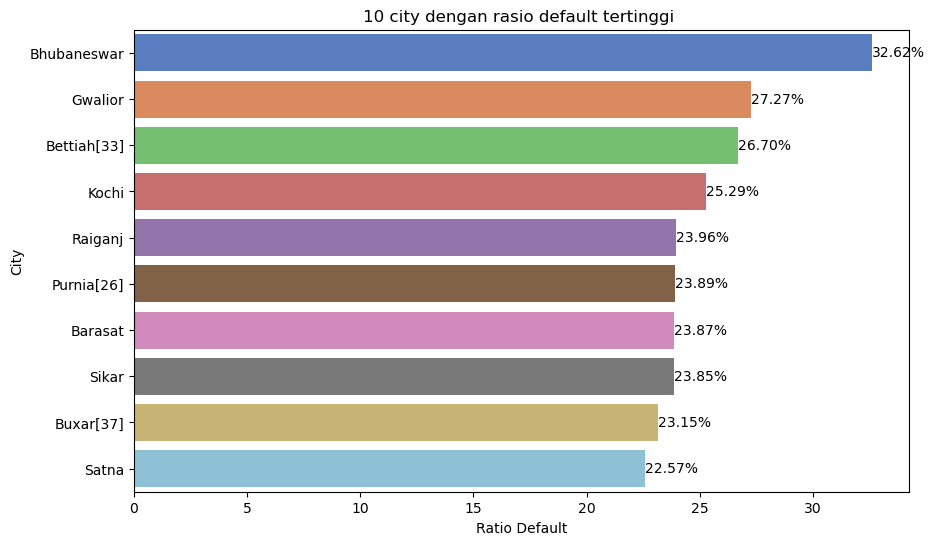

In [123]:
df_rasio_city = rasio_city.reset_index(name='Ratio')
df_rasio_city['Ratio'] *= 100
# Urutkan DataFrame berdasarkan kolom 'Ratio' secara menurun
df_rasio_city_sorted = df_rasio_city.sort_values(by='Ratio', ascending=False)

# Ambil 10 baris teratas
top_10_rasio_city = df_rasio_city_sorted.head(10)

# Membuat horizontal bar chart dengan Seaborn
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
sns.barplot(x='Ratio', y='CITY', data=top_10_rasio_city, palette='muted')  # palette='muted' untuk warna yang berbeda

for index, value in enumerate(top_10_rasio_city['Ratio']):
    plt.text(value, index, f'{value:.2f}%', va='center')
# Memberikan label pada sumbu x dan y
plt.xlabel('Ratio Default')
plt.ylabel('City')
plt.title('10 city dengan rasio default tertinggi ')
plt.show()

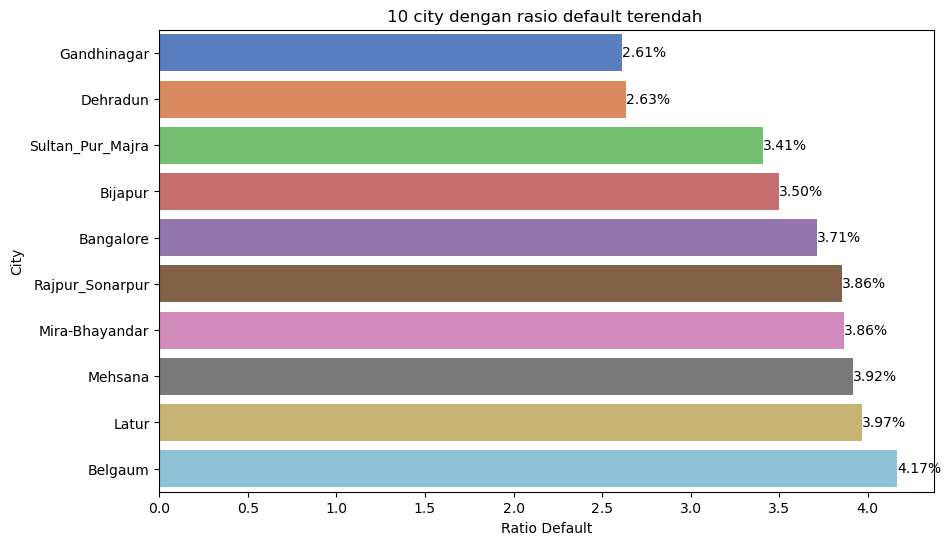

In [124]:
df_rasio_city = rasio_city.reset_index(name='Ratio')
df_rasio_city['Ratio'] *= 100
# Urutkan DataFrame berdasarkan kolom 'Ratio' secara menaik
df_rasio_city_sorted = df_rasio_city.sort_values(by='Ratio', ascending=True)

# Ambil 10 baris teratas
top_10_rasio_city = df_rasio_city_sorted.head(10)

# Membuat horizontal bar chart dengan Seaborn
plt.figure(figsize=(10, 6))  # Ukuran plot (opsional)
sns.barplot(x='Ratio', y='CITY', data=top_10_rasio_city, palette='muted')  # palette='muted' untuk warna yang berbeda

for index, value in enumerate(top_10_rasio_city['Ratio']):
    plt.text(value, index, f'{value:.2f}%', va='center')
# Memberikan label pada sumbu x dan y
plt.xlabel('Ratio Default')
plt.ylabel('City')
plt.title('10 city dengan rasio default terendah ')
plt.show()

In [125]:
rasio_city = df.groupby('CITY')['Risk_Flag'].value_counts(normalize=True)[:,1]

rasio_dict = {k: "{:.2f}".format(v) for k, v in rasio_city.items()}

df['CITY'] = df['CITY'].map(rasio_dict)

In [126]:
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,...,Exp_norm,Exp_std,Current_job_norm,Current_job_std,Current_house_norm,Current_house_std,Risk_Flag_norm,Risk_Flag_std,log_job_yrs,Risk_Flag_class
0,1,1303834,23,3,0,1,0,0,0.12,Madhya_Pradesh,...,0.15,-1.180232,0.214286,-0.914131,0.75,0.716356,0.0,-0.374501,1.098612,True
1,2,7574516,40,10,0,1,0,1,0.12,Maharashtra,...,0.50,-0.014067,0.642857,0.731036,0.75,0.716356,0.0,-0.374501,2.197225,True
2,3,3991815,66,4,1,1,0,9,0.13,Kerala,...,0.20,-1.013637,0.285714,-0.639936,0.00,-1.427981,0.0,-0.374501,1.386294,True
3,4,6256451,41,2,0,1,1,1,0.33,Odisha,...,0.10,-1.346827,0.142857,-1.188325,0.50,0.001577,1.0,2.670221,0.693147,False
4,5,5768871,47,11,0,1,0,9,0.12,Tamil_Nadu,...,0.55,0.152528,0.214286,-0.914131,1.00,1.431135,1.0,2.670221,1.098612,False


### 2. Feature Selection

In [64]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif 

X = df.drop(['Id', 'Risk_Flag', 'STATE'], axis=1) # Replace 'target_variable' with the name of your target column
y = df['Risk_Flag']

In [65]:
# Choose the scoring function (e.g., f_classif for classification tasks)
k_best = SelectKBest(score_func=f_classif, k=6)  # k is the number of top features to select
X_new = k_best.fit_transform(X, y)

selected_feature_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [66]:
import pandas as pd
import numpy as np

# Check for NaN values
if df.isnull().values.any():
    # Handle NaN values if necessary
    df.dropna(inplace=True)  # Remove rows with NaN values, or you can replace them with appropriate values

# Check for infinity values
if np.isinf(df.values).any():
    # Handle infinity values if necessary
    df = df.replace([np.inf, -np.inf], np.nan)  # Replace infinity with NaN
    df.dropna(inplace=True)  # Remove rows with NaN values, or you can replace them with appropriate values

# Proceed with feature selection code
# Choose the scoring function (e.g., f_classif for classification tasks)
k_best = SelectKBest(score_func=f_classif, k=6)  # k is the number of top features to select
X_new = k_best.fit_transform(X, y)

selected_feature_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [67]:
selected_features 

NameError: name 'selected_features' is not defined